
# Reto IA: Detección de contenido sensible en tuits de Twitter

El trolling es un término del argot de internet que se refiere a una persona que intencionalmente inicia discusiones o molesta a otros publicando comentarios provocadores. El único propósito del trolling es enfadar a las personas. Se ha comparado con el flaming en el contexto del ciberacoso. Además, muchos trolls consideran que lo que hacen es un “arte”. Frecuentemente se esconden detrás del anonimato. El símbolo del trolling es un dibujo en blanco y negro de una cara con una sonrisa traviesa, que simboliza la expresión que alguien hace mientras molesta a sus víctimas.

Propósito del trolling:
- Ser una fuente de entretenimiento para el troll.
- Ser ofensivo y argumentativo.
- Obtener placer al molestar intensamente a los demás.
- Buscar “presas” en internet (también conocido como tú).
- Llamar la atención.
- Sentirse poderoso.
- Ganar reconocimiento.
- Hacer enojar a la víctima.


#### Dataset
El Dataset es se conforma por un conjunto de Twits 20001. Cada twits ya posee una etiqueta que asigna una de las dos categorías.
#### Métrica de evaluación
 - Se hará uso de las redes neurales recurrentes (RNN) para clasificar cada twit según la clase a la que corresponda.

#### Estrategia de resolución
1. Se debe realizar el siguiente pre-procesado del texto de los Twits. Este está compuesto por:
    - Limpieza
    - Tokenizer
    - Pad_sequences (Acá es necesario analizar la base de datos para seleccionar un número óptimo de secuencias)


2. Se deben evaluar diferentes arquitecturas de red para evaluar la precisión del modelo para la clasificación. Estas arquitecturas inicialmente están compuestas por las capas: Secuantial(),Embedding(), LSTM(), Dropout(), Dense(). Los parámetros a evaluar son la dimensión de la capa Embedding() para los valores [32,64,128] y las de la capa LSTM() para los valores [64,128,196]. La función de pérdida será una suma cuadrática. Al final se obtendrá un vector de probabilidades, por lo que se puede asignar la categoría en función de la probabilidad.
    
3. Evaluar algunas variaciones en el modelo (Opcional)
    - Se cambiará la función de activación de la capa Dense por una Relu
    - Se definirá una tasa de aprendizaje de 1e-5 y un decaimiento de 1e-5
    - La capa Embedding tendrà una capa de salida 128 elementos
    - La capa LSTM tendrá como dimensión del espacio de salida un valor de 196
    - La función de perdida será una crosentropía binária
    - El modelo tendrá en cuenta el desbalance que hay en la cantidad de datos que hay en las cateogrías.
    - El número de epocas será aumentado a 25

In [1]:
import pandas as pd

data = pd.read_json('../Datos/Dataset for Detection of Cyber-Trolls.json',lines = True)
data.head(15)

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN
5,Ill save you the trouble sister. Here comes a ...,"{'notes': '', 'label': ['1']}",NaN
6,Im dead serious.Real athletes never cheat don...,"{'notes': '', 'label': ['1']}",NaN
7,...go absolutely insane.hate to be the bearer ...,"{'notes': '', 'label': ['1']}",NaN
8,Lmao im watching the same thing ahaha. The ga...,"{'notes': '', 'label': ['1']}",NaN
9,LOL no he said What do you call a jail cell ...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gensim

In [ ]:
import sys
import os
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import itertools
from sklearn.metrics import confusion_matrix
from __future__ import division

In [ ]:
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
import tensorflow as tf

In [ ]:
#!pip install nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from keras.layers import Dense,LSTM,Dropout,GRU,SimpleRNN,Embedding
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import unicodedata

def limpiar_texto(texto):
    """
    Limpia un texto eliminando espacios extra, convirtiéndolo a minúsculas,
    eliminando caracteres especiales y quitando acentos.

    Args:
        texto (str): Texto a limpiar.

    Returns:
        str: Texto limpio.
    """
    # Eliminar espacios al inicio y al final
    texto = texto.strip()
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar acentos
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
    # Eliminar caracteres especiales
    texto = re.sub(r'[^a-z0-9\s]', '', texto)
    # Eliminar espacios múltiples
    texto = re.sub(r'\s+', ' ', texto)
    return texto


In [ ]:
data.content = data.content.apply(limpiar_texto)

In [ ]:

data.drop(columns=['extras'])

,content,annotation
0,get fucking real dude,"{'notes': '', 'label': ['1']}"
1,she is as dirty as they come and that crook re...,"{'notes': '', 'label': ['1']}"
2,why did you fuck it up i could do it all day t...,"{'notes': '', 'label': ['1']}"
3,dude they dont finish enclosing the fucking sh...,"{'notes': '', 'label': ['1']}"
4,wtf are you talking about men no men thats not...,"{'notes': '', 'label': ['1']}"
...,...,...
19996,i dont but what is complaining about it going ...,"{'notes': '', 'label': ['0']}"
19997,bahah yeah im totally just gonna get pissed at...,"{'notes': '', 'label': ['0']}"
19998,hahahahaha im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}"
19999,whats something unique about ohio,"{'notes': '', 'label': ['0']}"


In [ ]:
 data["tag"] = data["annotation"].apply(lambda x: x.get("label") if isinstance(x, dict) else None)


In [ ]:
lista_tag = [i[0] for i in data.tag if isinstance(i, list) and len(i) > 0]

In [ ]:
data['dat_def'] = lista_tag

tokenizacion

In [ ]:
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
#             result.append(lemmatize_stemming(token))
            result.append(token)

    return result

In [ ]:
tokens = list(data.content.apply(preprocess))

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(tokens)

In [ ]:
data['tokens'] = tokenizer.texts_to_sequences(tokens)

In [ ]:
data.head()

,content,annotation,extras,tag,dat_def,tokens,longitud
0,get fucking real dude,"{'notes': '', 'label': ['1']}",NaN,[1],1,"[7, 101, 35]",3
1,she is as dirty as they come and that crook re...,"{'notes': '', 'label': ['1']}",NaN,[1],1,"[496, 50, 3784, 3785, 3786, 7, 2454, 417, 2955...",11
2,why did you fuck it up i could do it all day t...,"{'notes': '', 'label': ['1']}",NaN,[1],1,"[4, 187, 272, 1821, 286, 3787, 478, 217]",8
3,dude they dont finish enclosing the fucking sh...,"{'notes': '', 'label': ['1']}",NaN,[1],1,"[35, 6, 784, 3788, 7, 1320, 1, 226, 3789, 645,...",14
4,wtf are you talking about men no men thats not...,"{'notes': '', 'label': ['1']}",NaN,[1],1,"[143, 14, 3791, 14]",4


In [ ]:

data['longitud'] = data['tokens'].apply(len)

<Axes: xlabel='content', ylabel='longitud'>

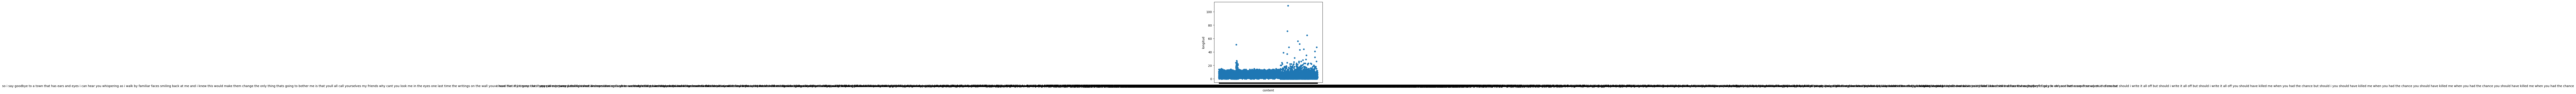

In [ ]:
data.plot(kind = 'scatter', x= 'content', y = 'longitud')

limite de 20

In [ ]:
from tensorflow.keras import layers, models
matriz_seq = tf.keras.utils.pad_sequences(
    data.tokens,
    maxlen=20,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0
)

In [ ]:
matriz_seq.shape

(20001, 20)

In [ ]:
maxlen = 20

model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=32, input_length=maxlen),
    layers.LSTM(128),
    layers.Dropout(0.2),
    layers.Dense(1, activation='relu')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
data.dat_def = data.dat_def.astype(float)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


labels = data.dat_def  # Ejemplo de etiquetas binarias

# Divide los datos en 80% entrenamiento y 20% validación
train_data, val_data, train_labels, val_labels = train_test_split(matriz_seq, labels, test_size=0.2, random_state=42)

print(f"Tamaño de los datos de entrenamiento: {train_data.shape}")
print(f"Tamaño de los datos de validación: {val_data.shape}")


Tamaño de los datos de entrenamiento: (16000, 20)
Tamaño de los datos de validación: (4001, 20)


# Entrenamiento

In [ ]:
history = model.fit(train_data, train_labels,
                    epochs=25,
                    batch_size=32,
                    validation_data = (val_data, val_labels))


Epoch 1/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6225 - loss: 0.7142 - val_accuracy: 0.7273 - val_loss: 0.5602
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8111 - loss: 0.4877 - val_accuracy: 0.8133 - val_loss: 0.6312
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8815 - loss: 0.3511 - val_accuracy: 0.8255 - val_loss: 0.5710
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9265 - loss: 0.2214 - val_accuracy: 0.8518 - val_loss: 0.6407
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9456 - loss: 0.1888 - val_accuracy: 0.8510 - val_loss: 0.5892
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9244 - loss: 0.2418 - val_accuracy: 0.8585 - val_loss: 0.7708
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9450 - loss: 0.1644 - val_accuracy: 0.8638 - val_loss: 0.8471
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9579 - loss: 0.1455 - val_accuracy: 0.

## Validacion

In [ ]:
test_loss, test_acc = model.evaluate(val_data, val_labels)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')


126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8574 - loss: 1.3008

Precisión en el conjunto de prueba: 0.8637840747833252
